In [2]:
import numpy as np
import isl
import altair as alt
import polars as pl
import math
import matplotlib.pyplot as plt


In [12]:
def var(x):
    """sample variance
    - equivalent to `np.var(x, ddof=1)
    """
    x = np.array(x)
    x = x[~np.isnan(x)]
    return sum((x - x.mean()) ** 2 / (len(x) - 1)).item()

def std(x):
    """sample standard deviation
    - equivalent to `np.std(x, ddof=1)
    """
    return var(x) ** 0.5

d = isl.get_data('Auto')['displacement']
(std(d) - np.std(d.to_numpy(), ddof=1).item()) ** 2

1.2924697071141057e-26

array([[0.7, 1.6],
       [1.6, 4.3]])

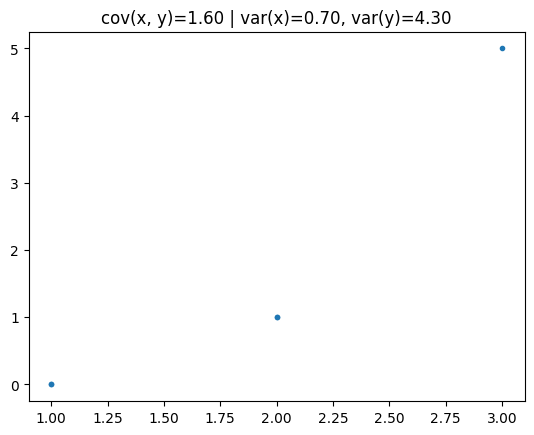

In [15]:
x= np.array([1,2,3,2,1])
y = np.array([0,1,5,1,0])
plt.plot(x,y, '.')
plt.title(f'cov(x, y)={np.sum((x-x.mean()) * (y-y.mean())) / (len(x) - 1):.2f} | {var(x)=:.2f}, {var(y)=:.2f}')
np.cov(x, y)

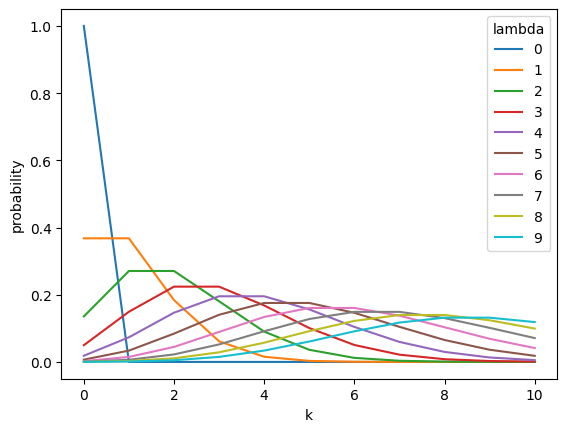

In [4]:

plt.figure()
for lambda_ in np.round(np.arange(0, 10, 1), 1):
    p_values = []
    k_values = np.linspace(0, 10, endpoint=True, dtype=int)
    for k in k_values:
        probabilitiy = (np.exp(-lambda_)* (lambda_ ** k)) / math.factorial(k)
        p_values.append(probabilitiy)
    plt.plot(k_values, p_values, label=str(lambda_))
plt.legend(title='lambda')
plt.xlabel('k')
plt.ylabel('probability')
plt.show()

In [9]:
lambda_ = np.round(np.logspace(-1, 2, num=10), 1)
k = np.linspace(0, 20, endpoint=True, dtype=int)
k_factorial = [math.factorial(k) for k in k]
(
    pl.DataFrame({
        'k': np.concat([k] * len(lambda_)),
        'k_factorial': np.concat([k_factorial] * len(lambda_)),
        'lambda': np.concat([np.full(len(k), i) for i in lambda_]),
    })
    .with_columns(
        pl.col('lambda').neg().exp().mul(pl.col('lambda') ** pl.col('k')).truediv(pl.col('k_factorial')).alias('probability')
    )
    .plot.line(
        x='k',
        y='probability',
        color='lambda:O',
    )
    .properties(
        title='Poisson probabilities'
    )
)

alt.Chart(...)

In [3]:
df = isl.get_data('Auto')
df.describe()

statistic,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
str,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0,"""392"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",23.445918,5.471939,194.41199,104.469388,2977.584184,15.541327,75.979592,1.576531,null
"""std""",7.805007,1.705783,104.644004,38.49116,849.40256,2.758864,3.683737,0.805518,null
"""min""",9.0,3.0,68.0,46.0,1613.0,8.0,70.0,1.0,"""amc ambassador brougham"""
"""25%""",17.0,4.0,105.0,75.0,2226.0,13.8,73.0,1.0,null
"""50%""",23.0,4.0,151.0,94.0,2807.0,15.5,76.0,1.0,null
"""75%""",29.0,8.0,267.0,125.0,3613.0,17.0,79.0,2.0,null
"""max""",46.6,8.0,455.0,230.0,5140.0,24.8,82.0,3.0,"""vw rabbit custom"""


In [29]:
df.unpivot(index=['mpg', 'name', 'origin']).sort('origin')

mpg,name,origin,variable,value
f64,str,i64,str,f64
18.0,"""chevrolet chevelle malibu""",1,"""cylinders""",8.0
15.0,"""buick skylark 320""",1,"""cylinders""",8.0
18.0,"""plymouth satellite""",1,"""cylinders""",8.0
16.0,"""amc rebel sst""",1,"""cylinders""",8.0
17.0,"""ford torino""",1,"""cylinders""",8.0
…,…,…,…,…
34.0,"""toyota corolla""",3,"""year""",82.0
38.0,"""honda civic""",3,"""year""",82.0
32.0,"""honda civic (auto)""",3,"""year""",82.0


In [27]:
base = (
    alt.Chart(df.unpivot(index=['mpg', 'name', 'origin']).with_columns(pl.col('origin').cast(str).replace({1: 'USA', 2: 'EU', 3: 'Japan'})))
    # .transform_regression('')
    .encode(
        y='mpg',
        x=alt.X('value', ).scale(zero=False),
        color='origin:N',
    )
)
(
    base.mark_point() 
    + 
    base.transform_regression('value', 'mpg', groupby=['origin'], method='linear').mark_line(color='red')
).facet(column='variable').resolve_scale(x='independent')


alt.FacetChart(...)